In [1]:
import os.path as op
from pathlib import Path
import glob

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

import mne
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
from mne.datasets import somato
import mne_bids

import pandas as pd
import scipy.signal as sig
import pickle

In [2]:
data = pd.read_csv("epilepsy_patients.csv", usecols = ["id", "session", "run", "task"])
data = data.drop_duplicates('id')

norm = data.loc[data['task'] == 'normal']
ep = data.loc[data['task'] == 'epilepsy']

norm.head(4)

#print(norm.shape, ep.shape)

#norm = norm.sample(n = 1, random_state = 0)
#ep = ep.sample(n = 1, random_state = 0)

#print(norm.shape, ep.shape)

,id,session,run,task
0,6249,4,0,normal
2,8576,1,0,normal
3,9002,1,0,normal
6,9051,1,0,normal


In [3]:
ep.head(4)

,id,session,run,task
12,3101,2,4,epilepsy
41,6622,1,0,epilepsy
49,3136,1,4,epilepsy
63,4401,1,0,epilepsy


In [4]:
root = Path('C:/Users/patri/OneDrive - Johns Hopkins/tuh_epilepsy_vs_normal/derivatives/ICA/')
list_5 = []
list_10 = []
list_25 = []
list_50 = []

for index, row in norm.iterrows():
    subject = '{:08d}'.format(row["id"])
    session = '{:03d}'.format(row["session"])
    run = '{:03d}'.format(row["run"])
    task = "normal"
    acq = "run"
    datatype = "eeg"
    bids_path = mne_bids.BIDSPath(subject=subject, session=session, task=task,
                     acquisition=None, run=run, datatype=datatype, root=root,
                     suffix='eeg', extension='.vhdr')
    raw = mne_bids.read_raw_bids(bids_path)
    
    df = raw.to_data_frame()
    df = df.set_index('time')
    test_array = np.array(df)
    split_5 = np.array_split(test_array, 5)
    split_10 = np.array_split(test_array, 10)
    split_25 = np.array_split(test_array, 25)
    split_50 = np.array_split(test_array, 50)
    
    list_5.append(split_5)
    list_10.append(split_10)
    list_25.append(split_25)
    list_50.append(split_50)
    
pickle.dump(list_5, open("normal_split_5.pkl", "wb"))
pickle.dump(list_10, open("normal_split_10.pkl", "wb"))
pickle.dump(list_25, open("normal_split_25.pkl", "wb"))
pickle.dump(list_50, open("normal_split_50.pkl", "wb"))

Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006249\ses-004\eeg\sub-00006249_ses-004_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006249\ses-004\eeg\sub-00006249_ses-004_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006249_ses-004_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006249\**\sub-00006249_ses-004*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006249_ses-004_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006249\**\sub-00006249_ses-004*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008576\ses-001\eeg\sub-00008576_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008576\ses-001\eeg\sub-00008576_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008576_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008576\**\sub-00008576_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008576_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008576\**\sub-00008576_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009002\ses-001\eeg\sub-00009002_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009002\ses-001\eeg\sub-00009002_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009002_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009002\**\sub-00009002_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009002_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009002\**\sub-00009002_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009051\ses-001\eeg\sub-00009051_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009051\ses-001\eeg\sub-00009051_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009051_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009051\**\sub-00009051_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009051_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009051\**\sub-00009051_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006473\ses-001\eeg\sub-00006473_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006473\ses-001\eeg\sub-00006473_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006473_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006473\**\sub-00006473_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006473_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006473\**\sub-00006473_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010586\ses-001\eeg\sub-00010586_ses-001_task-normal_run-002_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010586\ses-001\eeg\sub-00010586_ses-001_task-normal_run-002_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010586_ses-001_task-normal_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010586\**\sub-00010586_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010586_ses-001_task-normal_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010586\**\sub-00010586_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008317\ses-001\eeg\sub-00008317_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008317\ses-001\eeg\sub-00008317_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008317_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008317\**\sub-00008317_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008317_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008317\**\sub-00008317_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007732\ses-001\eeg\sub-00007732_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007732\ses-001\eeg\sub-00007732_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00007732_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007732\**\sub-00007732_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007732_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007732\**\sub-00007732_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010544\ses-001\eeg\sub-00010544_ses-001_task-normal_run-002_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010544\ses-001\eeg\sub-00010544_ses-001_task-normal_run-002_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010544_ses-001_task-normal_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010544\**\sub-00010544_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010544_ses-001_task-normal_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010544\**\sub-00010544_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006815\ses-001\eeg\sub-00006815_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006815\ses-001\eeg\sub-00006815_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006815_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006815\**\sub-00006815_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006815_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006815\**\sub-00006815_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009853\ses-001\eeg\sub-00009853_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009853\ses-001\eeg\sub-00009853_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009853_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009853\**\sub-00009853_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009853_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009853\**\sub-00009853_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007073\ses-001\eeg\sub-00007073_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007073\ses-001\eeg\sub-00007073_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00007073_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007073\**\sub-00007073_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007073_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007073\**\sub-00007073_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007848\ses-001\eeg\sub-00007848_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007848\ses-001\eeg\sub-00007848_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00007848_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007848\**\sub-00007848_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007848_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007848\**\sub-00007848_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003612\ses-001\eeg\sub-00003612_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003612\ses-001\eeg\sub-00003612_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00003612_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003612\**\sub-00003612_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00003612_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003612\**\sub-00003612_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009583\ses-001\eeg\sub-00009583_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009583\ses-001\eeg\sub-00009583_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009583_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009583\**\sub-00009583_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009583_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009583\**\sub-00009583_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009910\ses-001\eeg\sub-00009910_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009910\ses-001\eeg\sub-00009910_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009910_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009910\**\sub-00009910_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009910_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009910\**\sub-00009910_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006538\ses-001\eeg\sub-00006538_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006538\ses-001\eeg\sub-00006538_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006538_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006538\**\sub-00006538_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006538_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006538\**\sub-00006538_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008066\ses-001\eeg\sub-00008066_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008066\ses-001\eeg\sub-00008066_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008066_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008066\**\sub-00008066_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008066_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008066\**\sub-00008066_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005573\ses-001\eeg\sub-00005573_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005573\ses-001\eeg\sub-00005573_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00005573_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005573\**\sub-00005573_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00005573_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005573\**\sub-00005573_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009147\ses-001\eeg\sub-00009147_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009147\ses-001\eeg\sub-00009147_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009147_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009147\**\sub-00009147_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009147_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009147\**\sub-00009147_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009375\ses-001\eeg\sub-00009375_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009375\ses-001\eeg\sub-00009375_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009375_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009375\**\sub-00009375_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009375_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009375\**\sub-00009375_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007671\ses-001\eeg\sub-00007671_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007671\ses-001\eeg\sub-00007671_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00007671_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007671\**\sub-00007671_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007671_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007671\**\sub-00007671_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007026\ses-001\eeg\sub-00007026_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007026\ses-001\eeg\sub-00007026_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00007026_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007026\**\sub-00007026_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007026_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007026\**\sub-00007026_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007021\ses-001\eeg\sub-00007021_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007021\ses-001\eeg\sub-00007021_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00007021_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007021\**\sub-00007021_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007021_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007021\**\sub-00007021_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009945\ses-001\eeg\sub-00009945_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009945\ses-001\eeg\sub-00009945_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009945_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009945\**\sub-00009945_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009945_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009945\**\sub-00009945_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010292\ses-001\eeg\sub-00010292_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010292\ses-001\eeg\sub-00010292_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010292_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010292\**\sub-00010292_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010292_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010292\**\sub-00010292_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009710\ses-001\eeg\sub-00009710_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009710\ses-001\eeg\sub-00009710_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009710_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009710\**\sub-00009710_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009710_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009710\**\sub-00009710_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006917\ses-001\eeg\sub-00006917_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006917\ses-001\eeg\sub-00006917_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006917_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006917\**\sub-00006917_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006917_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006917\**\sub-00006917_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010085\ses-001\eeg\sub-00010085_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010085\ses-001\eeg\sub-00010085_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010085_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010085\**\sub-00010085_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010085_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010085\**\sub-00010085_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010620\ses-001\eeg\sub-00010620_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010620\ses-001\eeg\sub-00010620_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010620_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010620\**\sub-00010620_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010620_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010620\**\sub-00010620_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00002744\ses-001\eeg\sub-00002744_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00002744\ses-001\eeg\sub-00002744_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00002744_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00002744\**\sub-00002744_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00002744_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00002744\**\sub-00002744_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009358\ses-001\eeg\sub-00009358_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009358\ses-001\eeg\sub-00009358_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009358_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009358\**\sub-00009358_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009358_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009358\**\sub-00009358_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008443\ses-001\eeg\sub-00008443_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008443\ses-001\eeg\sub-00008443_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008443_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008443\**\sub-00008443_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008443_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008443\**\sub-00008443_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009333\ses-001\eeg\sub-00009333_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009333\ses-001\eeg\sub-00009333_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009333_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009333\**\sub-00009333_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009333_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009333\**\sub-00009333_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010674\ses-001\eeg\sub-00010674_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010674\ses-001\eeg\sub-00010674_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010674_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010674\**\sub-00010674_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010674_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010674\**\sub-00010674_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007862\ses-001\eeg\sub-00007862_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007862\ses-001\eeg\sub-00007862_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00007862_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007862\**\sub-00007862_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007862_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007862\**\sub-00007862_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008240\ses-001\eeg\sub-00008240_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008240\ses-001\eeg\sub-00008240_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008240_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008240\**\sub-00008240_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008240_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008240\**\sub-00008240_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010422\ses-001\eeg\sub-00010422_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010422\ses-001\eeg\sub-00010422_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010422_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010422\**\sub-00010422_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010422_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010422\**\sub-00010422_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010617\ses-001\eeg\sub-00010617_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010617\ses-001\eeg\sub-00010617_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010617_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010617\**\sub-00010617_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010617_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010617\**\sub-00010617_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009165\ses-001\eeg\sub-00009165_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009165\ses-001\eeg\sub-00009165_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009165_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009165\**\sub-00009165_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009165_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009165\**\sub-00009165_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008840\ses-001\eeg\sub-00008840_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008840\ses-001\eeg\sub-00008840_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008840_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008840\**\sub-00008840_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008840_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008840\**\sub-00008840_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009966\ses-001\eeg\sub-00009966_ses-001_task-normal_run-002_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009966\ses-001\eeg\sub-00009966_ses-001_task-normal_run-002_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009966_ses-001_task-normal_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009966\**\sub-00009966_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009966_ses-001_task-normal_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009966\**\sub-00009966_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009539\ses-001\eeg\sub-00009539_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009539\ses-001\eeg\sub-00009539_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009539_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009539\**\sub-00009539_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009539_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009539\**\sub-00009539_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008249\ses-001\eeg\sub-00008249_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008249\ses-001\eeg\sub-00008249_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008249_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008249\**\sub-00008249_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008249_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008249\**\sub-00008249_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008684\ses-001\eeg\sub-00008684_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008684\ses-001\eeg\sub-00008684_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008684_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008684\**\sub-00008684_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008684_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008684\**\sub-00008684_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006980\ses-001\eeg\sub-00006980_ses-001_task-normal_run-002_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006980\ses-001\eeg\sub-00006980_ses-001_task-normal_run-002_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006980_ses-001_task-normal_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006980\**\sub-00006980_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006980_ses-001_task-normal_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006980\**\sub-00006980_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009072\ses-001\eeg\sub-00009072_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009072\ses-001\eeg\sub-00009072_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009072_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009072\**\sub-00009072_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009072_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009072\**\sub-00009072_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010736\ses-001\eeg\sub-00010736_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010736\ses-001\eeg\sub-00010736_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010736_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010736\**\sub-00010736_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010736_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010736\**\sub-00010736_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006801\ses-001\eeg\sub-00006801_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006801\ses-001\eeg\sub-00006801_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006801_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006801\**\sub-00006801_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006801_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006801\**\sub-00006801_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008950\ses-001\eeg\sub-00008950_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008950\ses-001\eeg\sub-00008950_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008950_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008950\**\sub-00008950_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008950_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008950\**\sub-00008950_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008138\ses-001\eeg\sub-00008138_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008138\ses-001\eeg\sub-00008138_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008138_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008138\**\sub-00008138_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008138_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008138\**\sub-00008138_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009074\ses-001\eeg\sub-00009074_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009074\ses-001\eeg\sub-00009074_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009074_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009074\**\sub-00009074_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009074_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009074\**\sub-00009074_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006493\ses-001\eeg\sub-00006493_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006493\ses-001\eeg\sub-00006493_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006493_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006493\**\sub-00006493_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006493_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006493\**\sub-00006493_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009488\ses-001\eeg\sub-00009488_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009488\ses-001\eeg\sub-00009488_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009488_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009488\**\sub-00009488_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009488_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009488\**\sub-00009488_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009676\ses-001\eeg\sub-00009676_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009676\ses-001\eeg\sub-00009676_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009676_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009676\**\sub-00009676_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009676_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009676\**\sub-00009676_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006253\ses-003\eeg\sub-00006253_ses-003_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006253\ses-003\eeg\sub-00006253_ses-003_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006253_ses-003_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006253\**\sub-00006253_ses-003*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006253_ses-003_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006253\**\sub-00006253_ses-003*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008130\ses-001\eeg\sub-00008130_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008130\ses-001\eeg\sub-00008130_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008130_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008130\**\sub-00008130_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008130_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008130\**\sub-00008130_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007331\ses-001\eeg\sub-00007331_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007331\ses-001\eeg\sub-00007331_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00007331_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007331\**\sub-00007331_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007331_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007331\**\sub-00007331_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006687\ses-001\eeg\sub-00006687_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006687\ses-001\eeg\sub-00006687_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006687_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006687\**\sub-00006687_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006687_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006687\**\sub-00006687_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009604\ses-001\eeg\sub-00009604_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009604\ses-001\eeg\sub-00009604_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009604_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009604\**\sub-00009604_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009604_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009604\**\sub-00009604_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005459\ses-001\eeg\sub-00005459_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005459\ses-001\eeg\sub-00005459_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00005459_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005459\**\sub-00005459_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00005459_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005459\**\sub-00005459_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009666\ses-001\eeg\sub-00009666_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009666\ses-001\eeg\sub-00009666_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009666_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009666\**\sub-00009666_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009666_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009666\**\sub-00009666_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007161\ses-001\eeg\sub-00007161_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007161\ses-001\eeg\sub-00007161_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00007161_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007161\**\sub-00007161_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007161_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007161\**\sub-00007161_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007906\ses-001\eeg\sub-00007906_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007906\ses-001\eeg\sub-00007906_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00007906_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007906\**\sub-00007906_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007906_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007906\**\sub-00007906_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010311\ses-001\eeg\sub-00010311_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010311\ses-001\eeg\sub-00010311_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010311_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010311\**\sub-00010311_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010311_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010311\**\sub-00010311_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008408\ses-001\eeg\sub-00008408_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008408\ses-001\eeg\sub-00008408_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008408_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008408\**\sub-00008408_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008408_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008408\**\sub-00008408_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008437\ses-001\eeg\sub-00008437_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008437\ses-001\eeg\sub-00008437_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008437_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008437\**\sub-00008437_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008437_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008437\**\sub-00008437_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006906\ses-001\eeg\sub-00006906_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006906\ses-001\eeg\sub-00006906_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006906_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006906\**\sub-00006906_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006906_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006906\**\sub-00006906_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010662\ses-001\eeg\sub-00010662_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010662\ses-001\eeg\sub-00010662_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010662_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010662\**\sub-00010662_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010662_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010662\**\sub-00010662_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008455\ses-001\eeg\sub-00008455_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008455\ses-001\eeg\sub-00008455_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008455_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008455\**\sub-00008455_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008455_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008455\**\sub-00008455_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010095\ses-001\eeg\sub-00010095_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010095\ses-001\eeg\sub-00010095_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010095_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010095\**\sub-00010095_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010095_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010095\**\sub-00010095_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009725\ses-001\eeg\sub-00009725_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009725\ses-001\eeg\sub-00009725_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009725_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009725\**\sub-00009725_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009725_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009725\**\sub-00009725_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009977\ses-001\eeg\sub-00009977_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009977\ses-001\eeg\sub-00009977_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009977_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009977\**\sub-00009977_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009977_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009977\**\sub-00009977_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006567\ses-001\eeg\sub-00006567_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006567\ses-001\eeg\sub-00006567_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006567_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006567\**\sub-00006567_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006567_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006567\**\sub-00006567_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008867\ses-001\eeg\sub-00008867_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008867\ses-001\eeg\sub-00008867_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008867_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008867\**\sub-00008867_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008867_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008867\**\sub-00008867_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008090\ses-001\eeg\sub-00008090_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008090\ses-001\eeg\sub-00008090_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008090_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008090\**\sub-00008090_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008090_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008090\**\sub-00008090_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008695\ses-001\eeg\sub-00008695_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008695\ses-001\eeg\sub-00008695_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008695_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008695\**\sub-00008695_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008695_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008695\**\sub-00008695_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008037\ses-001\eeg\sub-00008037_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008037\ses-001\eeg\sub-00008037_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008037_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008037\**\sub-00008037_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008037_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008037\**\sub-00008037_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010460\ses-001\eeg\sub-00010460_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010460\ses-001\eeg\sub-00010460_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010460_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010460\**\sub-00010460_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010460_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010460\**\sub-00010460_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010838\ses-001\eeg\sub-00010838_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010838\ses-001\eeg\sub-00010838_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010838_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010838\**\sub-00010838_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010838_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010838\**\sub-00010838_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006533\ses-001\eeg\sub-00006533_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006533\ses-001\eeg\sub-00006533_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006533_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006533\**\sub-00006533_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006533_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006533\**\sub-00006533_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010017\ses-001\eeg\sub-00010017_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010017\ses-001\eeg\sub-00010017_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010017_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010017\**\sub-00010017_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010017_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010017\**\sub-00010017_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010442\ses-001\eeg\sub-00010442_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010442\ses-001\eeg\sub-00010442_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010442_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010442\**\sub-00010442_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010442_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010442\**\sub-00010442_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008644\ses-001\eeg\sub-00008644_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008644\ses-001\eeg\sub-00008644_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008644_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008644\**\sub-00008644_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008644_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008644\**\sub-00008644_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010075\ses-001\eeg\sub-00010075_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010075\ses-001\eeg\sub-00010075_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010075_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010075\**\sub-00010075_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010075_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010075\**\sub-00010075_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010429\ses-001\eeg\sub-00010429_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010429\ses-001\eeg\sub-00010429_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010429_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010429\**\sub-00010429_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010429_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010429\**\sub-00010429_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010624\ses-001\eeg\sub-00010624_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010624\ses-001\eeg\sub-00010624_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010624_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010624\**\sub-00010624_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010624_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010624\**\sub-00010624_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010444\ses-001\eeg\sub-00010444_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010444\ses-001\eeg\sub-00010444_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010444_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010444\**\sub-00010444_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010444_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010444\**\sub-00010444_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010472\ses-001\eeg\sub-00010472_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010472\ses-001\eeg\sub-00010472_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010472_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010472\**\sub-00010472_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010472_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010472\**\sub-00010472_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008446\ses-001\eeg\sub-00008446_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008446\ses-001\eeg\sub-00008446_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008446_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008446\**\sub-00008446_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008446_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008446\**\sub-00008446_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009560\ses-001\eeg\sub-00009560_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009560\ses-001\eeg\sub-00009560_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00009560_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009560\**\sub-00009560_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00009560_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00009560\**\sub-00009560_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010419\ses-001\eeg\sub-00010419_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010419\ses-001\eeg\sub-00010419_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010419_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010419\**\sub-00010419_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010419_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010419\**\sub-00010419_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007834\ses-001\eeg\sub-00007834_ses-001_task-normal_run-004_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007834\ses-001\eeg\sub-00007834_ses-001_task-normal_run-004_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00007834_ses-001_task-normal_run-004.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007834\**\sub-00007834_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007834_ses-001_task-normal_run-004.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007834\**\sub-00007834_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010101\ses-001\eeg\sub-00010101_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010101\ses-001\eeg\sub-00010101_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010101_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010101\**\sub-00010101_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010101_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010101\**\sub-00010101_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010155\ses-001\eeg\sub-00010155_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010155\ses-001\eeg\sub-00010155_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010155_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010155\**\sub-00010155_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010155_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010155\**\sub-00010155_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008134\ses-001\eeg\sub-00008134_ses-001_task-normal_run-002_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008134\ses-001\eeg\sub-00008134_ses-001_task-normal_run-002_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00008134_ses-001_task-normal_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008134\**\sub-00008134_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008134_ses-001_task-normal_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008134\**\sub-00008134_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010107\ses-001\eeg\sub-00010107_ses-001_task-normal_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010107\ses-001\eeg\sub-00010107_ses-001_task-normal_run-000_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010107_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010107\**\sub-00010107_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010107_ses-001_task-normal_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010107\**\sub-00010107_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006694\ses-001\eeg\sub-00006694_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006694\ses-001\eeg\sub-00006694_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00006694_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006694\**\sub-00006694_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006694_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006694\**\sub-00006694_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010539\ses-001\eeg\sub-00010539_ses-001_task-normal_run-002_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010539\ses-001\eeg\sub-00010539_ses-001_task-normal_run-002_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010539_ses-001_task-normal_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010539\**\sub-00010539_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010539_ses-001_task-normal_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010539\**\sub-00010539_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010501\ses-001\eeg\sub-00010501_ses-001_task-normal_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010501\ses-001\eeg\sub-00010501_ses-001_task-normal_run-001_channels.tsv.


<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any events.tsv associated with sub-00010501_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010501\**\sub-00010501_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-4-5b38eb41f93b>:17: RuntimeWarning: Did not find any coordsystem.json associated with sub-00010501_ses-001_task-normal_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00010501\**\sub-00010501_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


In [6]:
root = Path('C:/Users/patri/OneDrive - Johns Hopkins/tuh_epilepsy_vs_normal/derivatives/ICA/')

list_5 = []
list_10 = []
list_25 = []
list_50 = []

for index, row in ep.iterrows():
    subject = '{:08d}'.format(row["id"])
    session = '{:03d}'.format(row["session"])
    run = '{:03d}'.format(row["run"])
    task = "epilepsy"
    acq = "run"
    datatype = "eeg"
    bids_path = mne_bids.BIDSPath(subject=subject, session=session, task=task,
                     acquisition=None, run=run, datatype=datatype, root=root,
                     suffix='eeg', extension='.vhdr')
    raw = mne_bids.read_raw_bids(bids_path)
    
    df = raw.to_data_frame()
    df = df.set_index('time')
    test_array = np.array(df)
    split_5 = np.array_split(test_array, 5)
    split_10 = np.array_split(test_array, 10)
    split_25 = np.array_split(test_array, 25)
    split_50 = np.array_split(test_array, 50)
    
    list_5.append(split_5)
    list_10.append(split_10)
    list_25.append(split_25)
    list_50.append(split_50)
    
pickle.dump(list_5, open("epilepsy_split_5.pkl", "wb"))
pickle.dump(list_10, open("epilepsy_split_10.pkl", "wb"))
pickle.dump(list_25, open("epilepsy_split_25.pkl", "wb"))
pickle.dump(list_50, open("epilepsy_split_50.pkl", "wb"))

Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003101\ses-002\eeg\sub-00003101_ses-002_task-epilepsy_run-004_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003101\ses-002\eeg\sub-00003101_ses-002_task-epilepsy_run-004_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00003101_ses-002_task-epilepsy_run-004.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003101\**\sub-00003101_ses-002*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00003101_ses-002_task-epilepsy_run-004.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003101\**\sub-00003101_ses-002*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006622\ses-001\eeg\sub-00006622_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006622\ses-001\eeg\sub-00006622_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00006622_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006622\**\sub-00006622_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006622_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006622\**\sub-00006622_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003136\ses-001\eeg\sub-00003136_ses-001_task-epilepsy_run-004_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003136\ses-001\eeg\sub-00003136_ses-001_task-epilepsy_run-004_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00003136_ses-001_task-epilepsy_run-004.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003136\**\sub-00003136_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00003136_ses-001_task-epilepsy_run-004.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003136\**\sub-00003136_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00004401\ses-001\eeg\sub-00004401_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00004401\ses-001\eeg\sub-00004401_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00004401_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00004401\**\sub-00004401_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00004401_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00004401\**\sub-00004401_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008092\ses-014\eeg\sub-00008092_ses-014_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008092\ses-014\eeg\sub-00008092_ses-014_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00008092_ses-014_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008092\**\sub-00008092_ses-014*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008092_ses-014_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008092\**\sub-00008092_ses-014*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007813\ses-001\eeg\sub-00007813_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007813\ses-001\eeg\sub-00007813_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007813_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007813\**\sub-00007813_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007813_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007813\**\sub-00007813_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005765\ses-006\eeg\sub-00005765_ses-006_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005765\ses-006\eeg\sub-00005765_ses-006_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00005765_ses-006_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005765\**\sub-00005765_ses-006*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00005765_ses-006_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005765\**\sub-00005765_ses-006*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008270\ses-001\eeg\sub-00008270_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008270\ses-001\eeg\sub-00008270_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00008270_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008270\**\sub-00008270_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008270_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008270\**\sub-00008270_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003005\ses-006\eeg\sub-00003005_ses-006_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003005\ses-006\eeg\sub-00003005_ses-006_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00003005_ses-006_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003005\**\sub-00003005_ses-006*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00003005_ses-006_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003005\**\sub-00003005_ses-006*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006123\ses-002\eeg\sub-00006123_ses-002_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006123\ses-002\eeg\sub-00006123_ses-002_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00006123_ses-002_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006123\**\sub-00006123_ses-002*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006123_ses-002_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006123\**\sub-00006123_ses-002*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006927\ses-001\eeg\sub-00006927_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006927\ses-001\eeg\sub-00006927_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00006927_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006927\**\sub-00006927_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006927_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006927\**\sub-00006927_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005551\ses-008\eeg\sub-00005551_ses-008_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005551\ses-008\eeg\sub-00005551_ses-008_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00005551_ses-008_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005551\**\sub-00005551_ses-008*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00005551_ses-008_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005551\**\sub-00005551_ses-008*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005931\ses-001\eeg\sub-00005931_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005931\ses-001\eeg\sub-00005931_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00005931_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005931\**\sub-00005931_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00005931_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005931\**\sub-00005931_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007067\ses-001\eeg\sub-00007067_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007067\ses-001\eeg\sub-00007067_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007067_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007067\**\sub-00007067_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007067_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007067\**\sub-00007067_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007864\ses-001\eeg\sub-00007864_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007864\ses-001\eeg\sub-00007864_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007864_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007864\**\sub-00007864_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007864_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007864\**\sub-00007864_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007600\ses-001\eeg\sub-00007600_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007600\ses-001\eeg\sub-00007600_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007600_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007600\**\sub-00007600_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007600_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007600\**\sub-00007600_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006514\ses-014\eeg\sub-00006514_ses-014_task-epilepsy_run-002_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006514\ses-014\eeg\sub-00006514_ses-014_task-epilepsy_run-002_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00006514_ses-014_task-epilepsy_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006514\**\sub-00006514_ses-014*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006514_ses-014_task-epilepsy_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006514\**\sub-00006514_ses-014*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000930\ses-001\eeg\sub-00000930_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000930\ses-001\eeg\sub-00000930_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00000930_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000930\**\sub-00000930_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00000930_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000930\**\sub-00000930_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000592\ses-001\eeg\sub-00000592_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000592\ses-001\eeg\sub-00000592_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00000592_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000592\**\sub-00000592_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00000592_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000592\**\sub-00000592_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000355\ses-008\eeg\sub-00000355_ses-008_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000355\ses-008\eeg\sub-00000355_ses-008_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00000355_ses-008_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000355\**\sub-00000355_ses-008*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00000355_ses-008_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000355\**\sub-00000355_ses-008*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006607\ses-013\eeg\sub-00006607_ses-013_task-epilepsy_run-002_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006607\ses-013\eeg\sub-00006607_ses-013_task-epilepsy_run-002_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00006607_ses-013_task-epilepsy_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006607\**\sub-00006607_ses-013*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006607_ses-013_task-epilepsy_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006607\**\sub-00006607_ses-013*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00001819\ses-006\eeg\sub-00001819_ses-006_task-epilepsy_run-004_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00001819\ses-006\eeg\sub-00001819_ses-006_task-epilepsy_run-004_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00001819_ses-006_task-epilepsy_run-004.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00001819\**\sub-00001819_ses-006*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00001819_ses-006_task-epilepsy_run-004.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00001819\**\sub-00001819_ses-006*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007176\ses-002\eeg\sub-00007176_ses-002_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007176\ses-002\eeg\sub-00007176_ses-002_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007176_ses-002_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007176\**\sub-00007176_ses-002*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007176_ses-002_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007176\**\sub-00007176_ses-002*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007972\ses-001\eeg\sub-00007972_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007972\ses-001\eeg\sub-00007972_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007972_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007972\**\sub-00007972_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007972_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007972\**\sub-00007972_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007386\ses-001\eeg\sub-00007386_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007386\ses-001\eeg\sub-00007386_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007386_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007386\**\sub-00007386_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007386_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007386\**\sub-00007386_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007140\ses-012\eeg\sub-00007140_ses-012_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007140\ses-012\eeg\sub-00007140_ses-012_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007140_ses-012_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007140\**\sub-00007140_ses-012*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007140_ses-012_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007140\**\sub-00007140_ses-012*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005461\ses-001\eeg\sub-00005461_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005461\ses-001\eeg\sub-00005461_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00005461_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005461\**\sub-00005461_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00005461_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005461\**\sub-00005461_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007192\ses-001\eeg\sub-00007192_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007192\ses-001\eeg\sub-00007192_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007192_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007192\**\sub-00007192_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007192_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007192\**\sub-00007192_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007962\ses-001\eeg\sub-00007962_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007962\ses-001\eeg\sub-00007962_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007962_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007962\**\sub-00007962_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007962_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007962\**\sub-00007962_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003593\ses-001\eeg\sub-00003593_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003593\ses-001\eeg\sub-00003593_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00003593_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003593\**\sub-00003593_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00003593_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003593\**\sub-00003593_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005745\ses-001\eeg\sub-00005745_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005745\ses-001\eeg\sub-00005745_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00005745_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005745\**\sub-00005745_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00005745_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005745\**\sub-00005745_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00002309\ses-001\eeg\sub-00002309_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00002309\ses-001\eeg\sub-00002309_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00002309_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00002309\**\sub-00002309_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00002309_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00002309\**\sub-00002309_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008295\ses-001\eeg\sub-00008295_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008295\ses-001\eeg\sub-00008295_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00008295_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008295\**\sub-00008295_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008295_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008295\**\sub-00008295_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003281\ses-001\eeg\sub-00003281_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003281\ses-001\eeg\sub-00003281_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00003281_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003281\**\sub-00003281_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00003281_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003281\**\sub-00003281_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006103\ses-014\eeg\sub-00006103_ses-014_task-epilepsy_run-007_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006103\ses-014\eeg\sub-00006103_ses-014_task-epilepsy_run-007_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00006103_ses-014_task-epilepsy_run-007.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006103\**\sub-00006103_ses-014*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006103_ses-014_task-epilepsy_run-007.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006103\**\sub-00006103_ses-014*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007645\ses-006\eeg\sub-00007645_ses-006_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007645\ses-006\eeg\sub-00007645_ses-006_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007645_ses-006_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007645\**\sub-00007645_ses-006*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007645_ses-006_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007645\**\sub-00007645_ses-006*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005522\ses-001\eeg\sub-00005522_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005522\ses-001\eeg\sub-00005522_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00005522_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005522\**\sub-00005522_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00005522_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005522\**\sub-00005522_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007065\ses-001\eeg\sub-00007065_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007065\ses-001\eeg\sub-00007065_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007065_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007065\**\sub-00007065_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007065_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007065\**\sub-00007065_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006940\ses-001\eeg\sub-00006940_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006940\ses-001\eeg\sub-00006940_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00006940_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006940\**\sub-00006940_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006940_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006940\**\sub-00006940_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005553\ses-001\eeg\sub-00005553_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005553\ses-001\eeg\sub-00005553_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00005553_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005553\**\sub-00005553_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00005553_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005553\**\sub-00005553_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00004671\ses-008\eeg\sub-00004671_ses-008_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00004671\ses-008\eeg\sub-00004671_ses-008_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00004671_ses-008_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00004671\**\sub-00004671_ses-008*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00004671_ses-008_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00004671\**\sub-00004671_ses-008*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007656\ses-012\eeg\sub-00007656_ses-012_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007656\ses-012\eeg\sub-00007656_ses-012_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007656_ses-012_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007656\**\sub-00007656_ses-012*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007656_ses-012_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007656\**\sub-00007656_ses-012*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007635\ses-001\eeg\sub-00007635_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007635\ses-001\eeg\sub-00007635_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007635_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007635\**\sub-00007635_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007635_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007635\**\sub-00007635_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000883\ses-012\eeg\sub-00000883_ses-012_task-epilepsy_run-002_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000883\ses-012\eeg\sub-00000883_ses-012_task-epilepsy_run-002_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00000883_ses-012_task-epilepsy_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000883\**\sub-00000883_ses-012*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00000883_ses-012_task-epilepsy_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000883\**\sub-00000883_ses-012*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007267\ses-001\eeg\sub-00007267_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007267\ses-001\eeg\sub-00007267_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007267_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007267\**\sub-00007267_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007267_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007267\**\sub-00007267_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003667\ses-002\eeg\sub-00003667_ses-002_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003667\ses-002\eeg\sub-00003667_ses-002_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00003667_ses-002_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003667\**\sub-00003667_ses-002*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00003667_ses-002_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00003667\**\sub-00003667_ses-002*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007805\ses-001\eeg\sub-00007805_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007805\ses-001\eeg\sub-00007805_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007805_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007805\**\sub-00007805_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007805_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007805\**\sub-00007805_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007666\ses-001\eeg\sub-00007666_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007666\ses-001\eeg\sub-00007666_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007666_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007666\**\sub-00007666_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007666_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007666\**\sub-00007666_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006894\ses-001\eeg\sub-00006894_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006894\ses-001\eeg\sub-00006894_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00006894_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006894\**\sub-00006894_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006894_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006894\**\sub-00006894_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006805\ses-001\eeg\sub-00006805_ses-001_task-epilepsy_run-001_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006805\ses-001\eeg\sub-00006805_ses-001_task-epilepsy_run-001_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00006805_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006805\**\sub-00006805_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00006805_ses-001_task-epilepsy_run-001.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00006805\**\sub-00006805_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005641\ses-001\eeg\sub-00005641_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005641\ses-001\eeg\sub-00005641_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00005641_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005641\**\sub-00005641_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00005641_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00005641\**\sub-00005641_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007572\ses-006\eeg\sub-00007572_ses-006_task-epilepsy_run-002_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007572\ses-006\eeg\sub-00007572_ses-006_task-epilepsy_run-002_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007572_ses-006_task-epilepsy_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007572\**\sub-00007572_ses-006*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007572_ses-006_task-epilepsy_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007572\**\sub-00007572_ses-006*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007323\ses-001\eeg\sub-00007323_ses-001_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007323\ses-001\eeg\sub-00007323_ses-001_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00007323_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007323\**\sub-00007323_ses-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00007323_ses-001_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00007323\**\sub-00007323_ses-001*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008194\ses-006\eeg\sub-00008194_ses-006_task-epilepsy_run-002_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008194\ses-006\eeg\sub-00008194_ses-006_task-epilepsy_run-002_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00008194_ses-006_task-epilepsy_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008194\**\sub-00008194_ses-006*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00008194_ses-006_task-epilepsy_run-002.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00008194\**\sub-00008194_ses-006*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


Extracting parameters from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000767\ses-008\eeg\sub-00000767_ses-008_task-epilepsy_run-000_eeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000767\ses-008\eeg\sub-00000767_ses-008_task-epilepsy_run-000_channels.tsv.


<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any events.tsv associated with sub-00000767_ses-008_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000767\**\sub-00000767_ses-008*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
<ipython-input-6-0cb37f6594b2>:18: RuntimeWarning: Did not find any coordsystem.json associated with sub-00000767_ses-008_task-epilepsy_run-000.

The search_str was "C:\Users\patri\OneDrive - Johns Hopkins\tuh_epilepsy_vs_normal\derivatives\ICA\sub-00000767\**\sub-00000767_ses-008*coordsystem.json"
  raw = mne_bids.read_raw_bids(bids_path)


In [7]:
def split_plv(split_list, cols):
    plv_vals = np.zeros((len(split_list), len(split_list[0]), len(cols), len(cols)))
    for i, sub in enumerate(split_list):
        print('On subject {} out of {}'.format(i+1, len(split_list)))
        for j, split in enumerate(sub):
            split = sig.hilbert(split, axis = 0)
            split = np.angle(split)
            split = np.unwrap(split, axis = 0)
            for k in range(len(cols)):
                for l in range(len(cols)):
                    c_k = split[:, k]
                    c_l = split[:, l]
                    c_kl = c_k - c_l
                    c_kl = np.array([complex(0, a) for a in c_kl])
                    plv_vals[i, j, k, l] = np.abs(np.sum(np.exp(c_kl))) / len(c_kl)
    return plv_vals

In [9]:
cols = pickle.load(open("chan_names.pkl", "rb"))

list_5 = pickle.load(open("epilepsy_split_5.pkl", "rb"))
plv_5 = split_plv(list_5, cols)
pickle.dump(plv_5, open("epilepsy_plv_5.pkl", "wb"))

On subject 1 out of 55
On subject 2 out of 55
On subject 3 out of 55
On subject 4 out of 55
On subject 5 out of 55
On subject 6 out of 55
On subject 7 out of 55
On subject 8 out of 55
On subject 9 out of 55
On subject 10 out of 55
On subject 11 out of 55
On subject 12 out of 55
On subject 13 out of 55
On subject 14 out of 55
On subject 15 out of 55
On subject 16 out of 55
On subject 17 out of 55
On subject 18 out of 55
On subject 19 out of 55
On subject 20 out of 55
On subject 21 out of 55
On subject 22 out of 55
On subject 23 out of 55
On subject 24 out of 55
On subject 25 out of 55
On subject 26 out of 55
On subject 27 out of 55
On subject 28 out of 55
On subject 29 out of 55
On subject 30 out of 55
On subject 31 out of 55
On subject 32 out of 55
On subject 33 out of 55
On subject 34 out of 55
On subject 35 out of 55
On subject 36 out of 55
On subject 37 out of 55
On subject 38 out of 55
On subject 39 out of 55
On subject 40 out of 55
On subject 41 out of 55
On subject 42 out of 55
O

In [10]:
list_10 = pickle.load(open("epilepsy_split_10.pkl", "rb"))
plv_10 = split_plv(list_10, cols)
pickle.dump(plv_10, open("epilepsy_plv_10.pkl", "wb"))

On subject 1 out of 55
On subject 2 out of 55
On subject 3 out of 55
On subject 4 out of 55
On subject 5 out of 55
On subject 6 out of 55
On subject 7 out of 55
On subject 8 out of 55
On subject 9 out of 55
On subject 10 out of 55
On subject 11 out of 55
On subject 12 out of 55
On subject 13 out of 55
On subject 14 out of 55
On subject 15 out of 55
On subject 16 out of 55
On subject 17 out of 55
On subject 18 out of 55
On subject 19 out of 55
On subject 20 out of 55
On subject 21 out of 55
On subject 22 out of 55
On subject 23 out of 55
On subject 24 out of 55
On subject 25 out of 55
On subject 26 out of 55
On subject 27 out of 55
On subject 28 out of 55
On subject 29 out of 55
On subject 30 out of 55
On subject 31 out of 55
On subject 32 out of 55
On subject 33 out of 55
On subject 34 out of 55
On subject 35 out of 55
On subject 36 out of 55
On subject 37 out of 55
On subject 38 out of 55
On subject 39 out of 55
On subject 40 out of 55
On subject 41 out of 55
On subject 42 out of 55
O

In [11]:
list_25 = pickle.load(open("epilepsy_split_25.pkl", "rb"))
plv_25 = split_plv(list_25, cols)
pickle.dump(plv_25, open("epilepsy_plv_25.pkl", "wb"))

On subject 1 out of 55
On subject 2 out of 55
On subject 3 out of 55
On subject 4 out of 55
On subject 5 out of 55
On subject 6 out of 55
On subject 7 out of 55
On subject 8 out of 55
On subject 9 out of 55
On subject 10 out of 55
On subject 11 out of 55
On subject 12 out of 55
On subject 13 out of 55
On subject 14 out of 55
On subject 15 out of 55
On subject 16 out of 55
On subject 17 out of 55
On subject 18 out of 55
On subject 19 out of 55
On subject 20 out of 55
On subject 21 out of 55
On subject 22 out of 55
On subject 23 out of 55
On subject 24 out of 55
On subject 25 out of 55
On subject 26 out of 55
On subject 27 out of 55
On subject 28 out of 55
On subject 29 out of 55
On subject 30 out of 55
On subject 31 out of 55
On subject 32 out of 55
On subject 33 out of 55
On subject 34 out of 55
On subject 35 out of 55
On subject 36 out of 55
On subject 37 out of 55
On subject 38 out of 55
On subject 39 out of 55
On subject 40 out of 55
On subject 41 out of 55
On subject 42 out of 55
O

In [12]:
list_50 = pickle.load(open("epilepsy_split_50.pkl", "rb"))
plv_50 = split_plv(list_50, cols)
pickle.dump(plv_50, open("epilepsy_plv_50.pkl", "wb"))

On subject 1 out of 55
On subject 2 out of 55
On subject 3 out of 55
On subject 4 out of 55
On subject 5 out of 55
On subject 6 out of 55
On subject 7 out of 55
On subject 8 out of 55
On subject 9 out of 55
On subject 10 out of 55
On subject 11 out of 55
On subject 12 out of 55
On subject 13 out of 55
On subject 14 out of 55
On subject 15 out of 55
On subject 16 out of 55
On subject 17 out of 55
On subject 18 out of 55
On subject 19 out of 55
On subject 20 out of 55
On subject 21 out of 55
On subject 22 out of 55
On subject 23 out of 55
On subject 24 out of 55
On subject 25 out of 55
On subject 26 out of 55
On subject 27 out of 55
On subject 28 out of 55
On subject 29 out of 55
On subject 30 out of 55
On subject 31 out of 55
On subject 32 out of 55
On subject 33 out of 55
On subject 34 out of 55
On subject 35 out of 55
On subject 36 out of 55
On subject 37 out of 55
On subject 38 out of 55
On subject 39 out of 55
On subject 40 out of 55
On subject 41 out of 55
On subject 42 out of 55
O

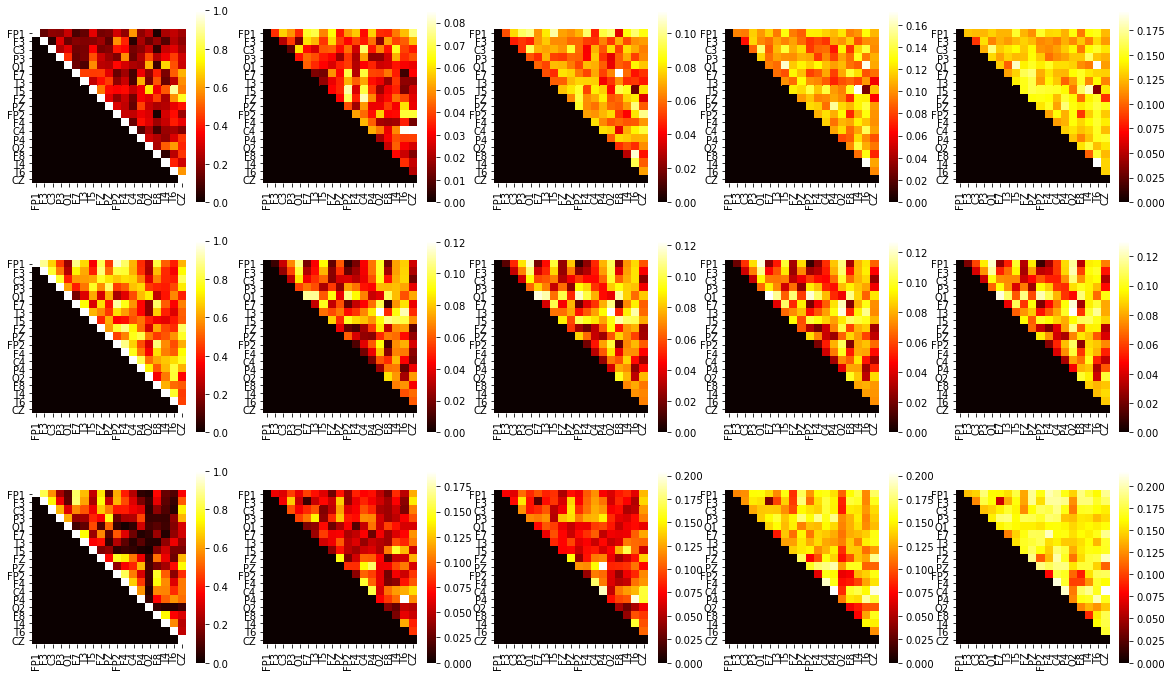

In [13]:
eeg_stack = pickle.load(open("epilepsy_eeg.pkl", "rb"))
plv_5 = pickle.load(open("epilepsy_plv_5.pkl", "rb"))
plv_10 = pickle.load(open("epilepsy_plv_10.pkl", "rb"))
plv_25 = pickle.load(open("epilepsy_plv_25.pkl", "rb"))
plv_50 = pickle.load(open("epilepsy_plv_50.pkl", "rb"))
cols = pickle.load(open("chan_names.pkl", "rb"))

odd = list(range(1, 19, 2))
even = list(range(0, 19, 2))
new = even + odd
cols = cols[new]

fig, axes = plt.subplots(3, 5, figsize = (20,12))

for i in range(3):
    
    true = eeg_stack[i]
    true = true[new, :]
    true = true[:, new]
    true = np.triu(true)
    
    std_5 = np.std(plv_5[i], axis = 0)
    std_5 = std_5[new, :]
    std_5 = std_5[:, new]
    std_5 = np.triu(std_5)
    
    std_10 = np.std(plv_10[i], axis = 0)
    std_10 = std_10[new, :]
    std_10 = std_10[:, new]
    std_10 = np.triu(std_10)
    
    std_25 = np.std(plv_25[i], axis = 0)
    std_25 = std_25[new, :]
    std_25 = std_25[:, new]
    std_25 = np.triu(std_25)
    
    std_50 = np.std(plv_50[i], axis = 0)
    std_50 = std_50[new, :]
    std_50 = std_50[:, new]
    std_50 = np.triu(std_50)
    
    sbs.heatmap(ax = axes[i, 0], data=true, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 1], data=std_5, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 2], data=std_10, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 3], data=std_25, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 4], data=std_50, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)

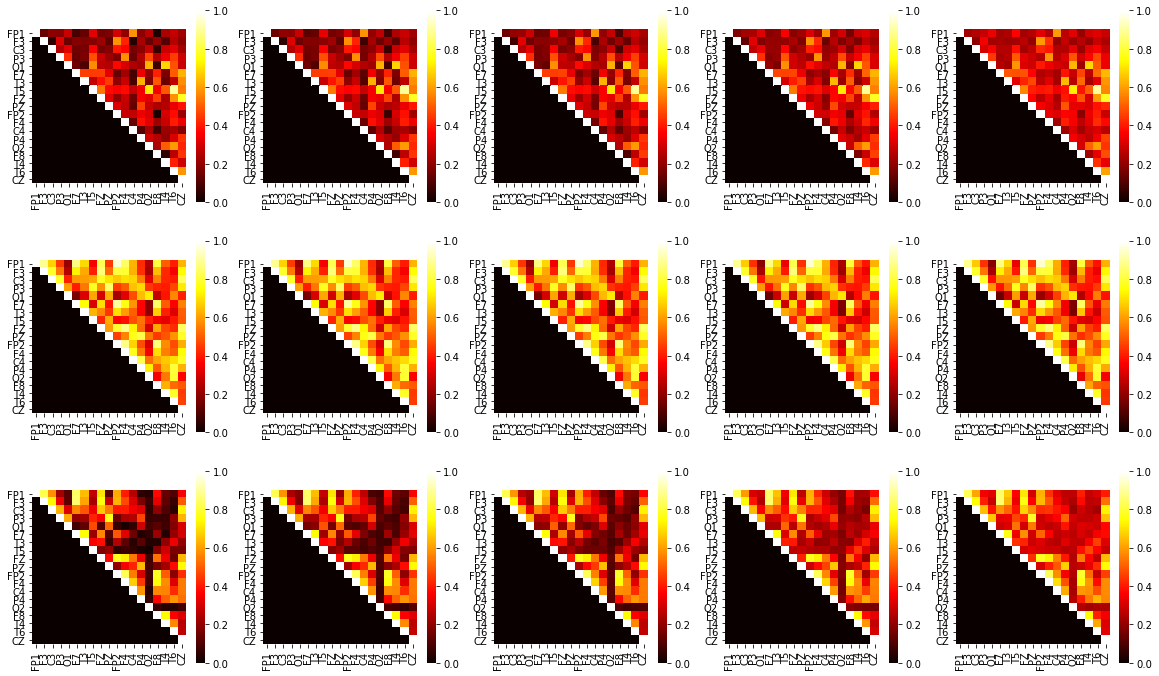

In [14]:
fig, axes = plt.subplots(3, 5, figsize = (20,12))

for i in range(3):
    
    true = eeg_stack[i]
    true = true[new, :]
    true = true[:, new]
    true = np.triu(true)
    
    mean_5 = np.mean(plv_5[i], axis = 0)
    mean_5 = mean_5[new, :]
    mean_5 = mean_5[:, new]
    mean_5 = np.triu(mean_5)
    
    mean_10 = np.mean(plv_10[i], axis = 0)
    mean_10 = mean_10[new, :]
    mean_10 = mean_10[:, new]
    mean_10 = np.triu(mean_10)
    
    mean_25 = np.mean(plv_25[i], axis = 0)
    mean_25 = mean_25[new, :]
    mean_25 = mean_25[:, new]
    mean_25 = np.triu(mean_25)
    
    mean_50 = np.mean(plv_50[i], axis = 0)
    mean_50 = mean_50[new, :]
    mean_50 = mean_50[:, new]
    mean_50 = np.triu(mean_50)
    
    sbs.heatmap(ax = axes[i, 0], data=true, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 1], data=mean_5, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 2], data=mean_10, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 3], data=mean_25, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 4], data=mean_50, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)

# Normal

In [15]:
cols = pickle.load(open("chan_names.pkl", "rb"))

list_5 = pickle.load(open("normal_split_5.pkl", "rb"))
plv_5 = split_plv(list_5, cols)
pickle.dump(plv_5, open("normal_plv_5.pkl", "wb"))

On subject 1 out of 100
On subject 2 out of 100
On subject 3 out of 100
On subject 4 out of 100
On subject 5 out of 100
On subject 6 out of 100
On subject 7 out of 100
On subject 8 out of 100
On subject 9 out of 100
On subject 10 out of 100
On subject 11 out of 100
On subject 12 out of 100
On subject 13 out of 100
On subject 14 out of 100
On subject 15 out of 100
On subject 16 out of 100
On subject 17 out of 100
On subject 18 out of 100
On subject 19 out of 100
On subject 20 out of 100
On subject 21 out of 100
On subject 22 out of 100
On subject 23 out of 100
On subject 24 out of 100
On subject 25 out of 100
On subject 26 out of 100
On subject 27 out of 100
On subject 28 out of 100
On subject 29 out of 100
On subject 30 out of 100
On subject 31 out of 100
On subject 32 out of 100
On subject 33 out of 100
On subject 34 out of 100
On subject 35 out of 100
On subject 36 out of 100
On subject 37 out of 100
On subject 38 out of 100
On subject 39 out of 100
On subject 40 out of 100
On subjec

In [16]:
list_10 = pickle.load(open("normal_split_10.pkl", "rb"))
plv_10 = split_plv(list_10, cols)
pickle.dump(plv_10, open("normal_plv_10.pkl", "wb"))

On subject 1 out of 100
On subject 2 out of 100
On subject 3 out of 100
On subject 4 out of 100
On subject 5 out of 100
On subject 6 out of 100
On subject 7 out of 100
On subject 8 out of 100
On subject 9 out of 100
On subject 10 out of 100
On subject 11 out of 100
On subject 12 out of 100
On subject 13 out of 100
On subject 14 out of 100
On subject 15 out of 100
On subject 16 out of 100
On subject 17 out of 100
On subject 18 out of 100
On subject 19 out of 100
On subject 20 out of 100
On subject 21 out of 100
On subject 22 out of 100
On subject 23 out of 100
On subject 24 out of 100
On subject 25 out of 100
On subject 26 out of 100
On subject 27 out of 100
On subject 28 out of 100
On subject 29 out of 100
On subject 30 out of 100
On subject 31 out of 100
On subject 32 out of 100
On subject 33 out of 100
On subject 34 out of 100
On subject 35 out of 100
On subject 36 out of 100
On subject 37 out of 100
On subject 38 out of 100
On subject 39 out of 100
On subject 40 out of 100
On subjec

In [17]:
list_25 = pickle.load(open("normal_split_25.pkl", "rb"))
plv_25 = split_plv(list_25, cols)
pickle.dump(plv_25, open("normal_plv_25.pkl", "wb"))

On subject 1 out of 100
On subject 2 out of 100
On subject 3 out of 100
On subject 4 out of 100
On subject 5 out of 100
On subject 6 out of 100
On subject 7 out of 100
On subject 8 out of 100
On subject 9 out of 100
On subject 10 out of 100
On subject 11 out of 100
On subject 12 out of 100
On subject 13 out of 100
On subject 14 out of 100
On subject 15 out of 100
On subject 16 out of 100
On subject 17 out of 100
On subject 18 out of 100
On subject 19 out of 100
On subject 20 out of 100
On subject 21 out of 100
On subject 22 out of 100
On subject 23 out of 100
On subject 24 out of 100
On subject 25 out of 100
On subject 26 out of 100
On subject 27 out of 100
On subject 28 out of 100
On subject 29 out of 100
On subject 30 out of 100
On subject 31 out of 100
On subject 32 out of 100
On subject 33 out of 100
On subject 34 out of 100
On subject 35 out of 100
On subject 36 out of 100
On subject 37 out of 100
On subject 38 out of 100
On subject 39 out of 100
On subject 40 out of 100
On subjec

In [18]:
list_50 = pickle.load(open("normal_split_50.pkl", "rb"))
plv_50 = split_plv(list_50, cols)
pickle.dump(plv_50, open("normal_plv_50.pkl", "wb"))

On subject 1 out of 100
On subject 2 out of 100
On subject 3 out of 100
On subject 4 out of 100
On subject 5 out of 100
On subject 6 out of 100
On subject 7 out of 100
On subject 8 out of 100
On subject 9 out of 100
On subject 10 out of 100
On subject 11 out of 100
On subject 12 out of 100
On subject 13 out of 100
On subject 14 out of 100
On subject 15 out of 100
On subject 16 out of 100
On subject 17 out of 100
On subject 18 out of 100
On subject 19 out of 100
On subject 20 out of 100
On subject 21 out of 100
On subject 22 out of 100
On subject 23 out of 100
On subject 24 out of 100
On subject 25 out of 100
On subject 26 out of 100
On subject 27 out of 100
On subject 28 out of 100
On subject 29 out of 100
On subject 30 out of 100
On subject 31 out of 100
On subject 32 out of 100
On subject 33 out of 100
On subject 34 out of 100
On subject 35 out of 100
On subject 36 out of 100
On subject 37 out of 100
On subject 38 out of 100
On subject 39 out of 100
On subject 40 out of 100
On subjec

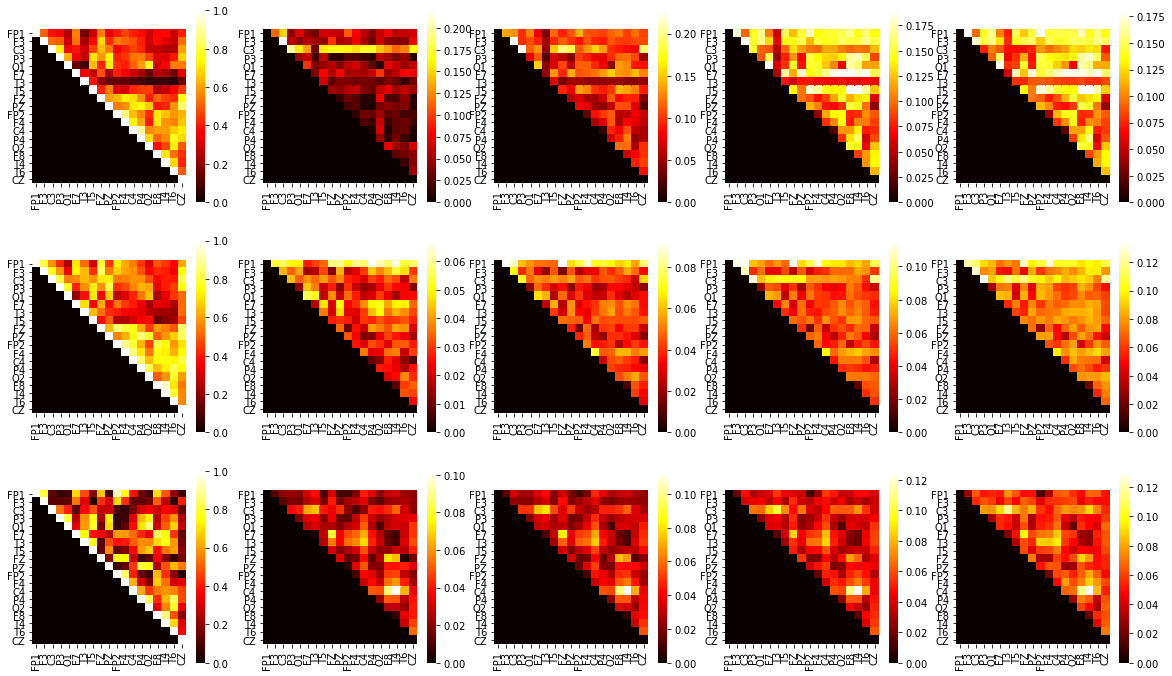

In [19]:
eeg_stack = pickle.load(open("normal_eeg.pkl", "rb"))
plv_5 = pickle.load(open("normal_plv_5.pkl", "rb"))
plv_10 = pickle.load(open("normal_plv_10.pkl", "rb"))
plv_25 = pickle.load(open("normal_plv_25.pkl", "rb"))
plv_50 = pickle.load(open("normal_plv_50.pkl", "rb"))
cols = pickle.load(open("chan_names.pkl", "rb"))

odd = list(range(1, 19, 2))
even = list(range(0, 19, 2))
new = even + odd
cols = cols[new]

fig, axes = plt.subplots(3, 5, figsize = (20,12))

for i in range(3):
    
    true = eeg_stack[i]
    true = true[new, :]
    true = true[:, new]
    true = np.triu(true)
    
    std_5 = np.std(plv_5[i], axis = 0)
    std_5 = std_5[new, :]
    std_5 = std_5[:, new]
    std_5 = np.triu(std_5)
    
    std_10 = np.std(plv_10[i], axis = 0)
    std_10 = std_10[new, :]
    std_10 = std_10[:, new]
    std_10 = np.triu(std_10)
    
    std_25 = np.std(plv_25[i], axis = 0)
    std_25 = std_25[new, :]
    std_25 = std_25[:, new]
    std_25 = np.triu(std_25)
    
    std_50 = np.std(plv_50[i], axis = 0)
    std_50 = std_50[new, :]
    std_50 = std_50[:, new]
    std_50 = np.triu(std_50)
    
    sbs.heatmap(ax = axes[i, 0], data=true, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 1], data=std_5, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 2], data=std_10, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 3], data=std_25, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 4], data=std_50, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)

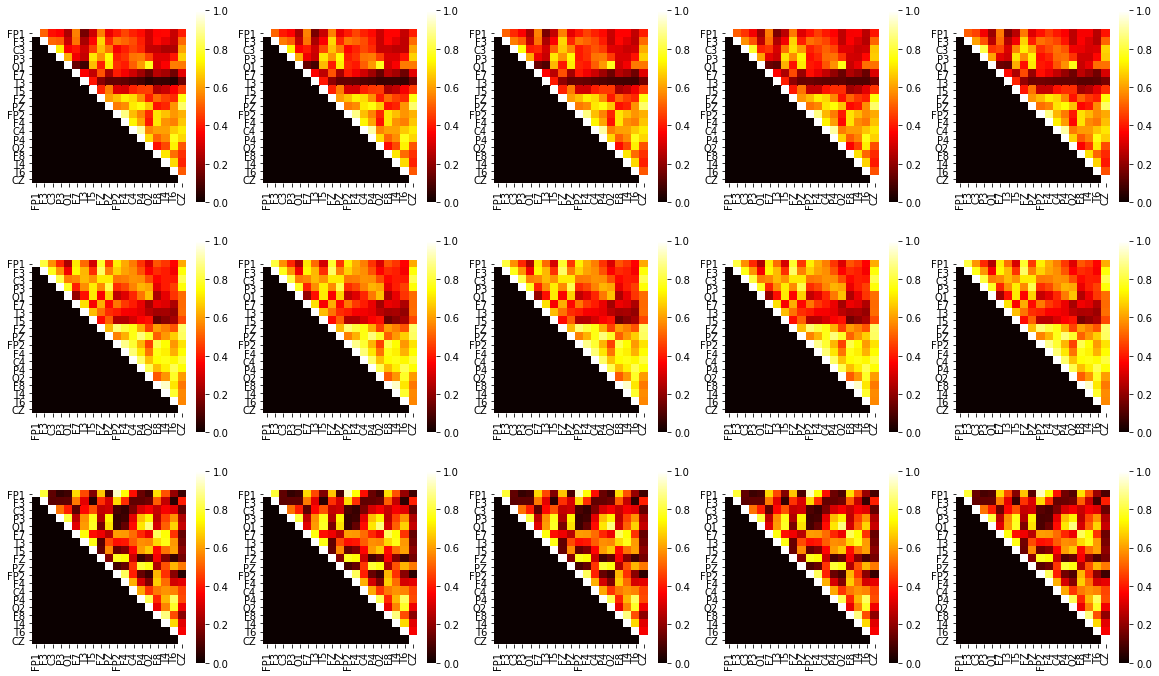

In [20]:
fig, axes = plt.subplots(3, 5, figsize = (20,12))

for i in range(3):
    
    true = eeg_stack[i]
    true = true[new, :]
    true = true[:, new]
    true = np.triu(true)
    
    mean_5 = np.mean(plv_5[i], axis = 0)
    mean_5 = mean_5[new, :]
    mean_5 = mean_5[:, new]
    mean_5 = np.triu(mean_5)
    
    mean_10 = np.mean(plv_10[i], axis = 0)
    mean_10 = mean_10[new, :]
    mean_10 = mean_10[:, new]
    mean_10 = np.triu(mean_10)
    
    mean_25 = np.mean(plv_25[i], axis = 0)
    mean_25 = mean_25[new, :]
    mean_25 = mean_25[:, new]
    mean_25 = np.triu(mean_25)
    
    mean_50 = np.mean(plv_50[i], axis = 0)
    mean_50 = mean_50[new, :]
    mean_50 = mean_50[:, new]
    mean_50 = np.triu(mean_50)
    
    sbs.heatmap(ax = axes[i, 0], data=true, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 1], data=mean_5, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 2], data=mean_10, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 3], data=mean_25, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)
    sbs.heatmap(ax = axes[i, 4], data=mean_50, cmap = 'hot', square = True, xticklabels = cols, yticklabels = cols)

In [21]:
plv_5.shape

(100, 5, 19, 19)